In [1]:
import pandas as pd
import re #regular expression matching for removing unwanted columns by name
import natsort as ns #3rd party package for natural sorting

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df0_raw = pd.read_csv("5G_count_all.tsv", sep = '\t')

# Removing columns

Need to remove the following columns manually 

[total, ribo0, br1_QC, br2_QC] - these dont exist in the dataframe 

[5GB1_ferm_WT_QC, 5GB1_ferm_Ack_QC, 5GB1C_latelog_vial_TR2_QC, 5GB1_FM58_Td20h_TR1_QC, 5GB1_FM58_Td32h_TR3_QC, 5GB1_LTrecycle_TR1_QC, 5GB1_LTrecycle_TR1,
5GB1_vial_wLa_TR3, 5GB1_vial_woLa_TR2]

Need to remove all QC runs except FM34 which we will keep

In [3]:
to_remove = ["5GB1_ferm_WT_QC", "5GB1_ferm_Ack_QC", "5GB1C_latelog_vial_TR2_QC", 
             "5GB1_FM58_Td20h_TR1_QC", "5GB1_FM58_Td32h_TR3_QC", "5GB1_LTrecycle_TR1_QC", "5GB1_LTrecycle_TR1",
             "5GB1_vial_wLa_TR3", "5GB1_vial_woLa_TR2"] 

In [4]:
#manually removing some unwanted columns 
df1_raw_filtered = df0_raw.drop(df0_raw.loc[:,to_remove].columns, axis = 1)
#Isolating FM34 - Cu transition 3+ hours 
df1a_FM34_only = df1_raw_filtered.select(lambda x: re.search("FM34", x), axis=1)
#Removing all QC runs 
df1_raw_filtered = df1_raw_filtered.select(lambda x: not re.search("QC", x), axis=1)


In [5]:
#naturally sorting the filtered columns
to_sort = df1_raw_filtered.loc[:,"5GB1_FM69_t2_TR1":]

cols = list(ns.natsorted(to_sort.columns))
cols_sorted = to_sort[cols]

#adding descriptive columns
qualitative = df1_raw_filtered.loc[:, "locus_tag":"translation"]
df1b_filtered_sorted = pd.concat([qualitative, cols_sorted], axis=1)

#isolating FM40 (to be added back later for particular order )
df1b_FM40_only = df1b_filtered_sorted.select(lambda x: re.search("FM40", x), axis=1)

#removing FM40 (to be added right back at the end)
df1b_filtered_sorted = df1b_filtered_sorted.select(lambda x: not re.search("FM40", x), axis=1)

#Adding FM40
cleaned_up = pd.concat([df1b_filtered_sorted, df1b_FM40_only], axis=1)

#adding FM34
df2_cleaned_up = pd.concat([cleaned_up, df1a_FM34_only], axis=1)

#setting locus tag as index
df2_cleaned_up = df2_cleaned_up.set_index("locus_tag")

In [6]:
#new column names in the same order as df2_cleaned_up (except for FM23)
df_new_columns = pd.DataFrame({"New_columns":
                                            ['FM12_CH4-lim_3.0/day',
                                             'FM12_CH4-lim_3.0/day_R1',
                                             'FM14_CH4-lim_3.0/day',
                                             'FM14_CH4-lim_3.0/day_R1',
                                             'FM18_CH3OH_4.1/day',
                                             'FM18_CH3OH_4.1/day_R1',
                                             'FM19_O2-lim_3.5.day',
                                             'FM19_O2-lim_3.5.day_R1',
                                             'FM19_O2-lim_3.5.day_R2',
                                             'FM20_no-lim_5.2/day',
                                             'FM20_no-lim_5.2/day_R1',
                                             'FM21_no-lim_5.4/day',
                                             'FM21_no-lim_5.4/day_R1',
                                             'FM21_no-lim_5.4/day_R2',
                                             'FM22_O2-lim_4.2/day',
                                             'FM22_O2-lim_4.2/day_R1',
                                             'FM22_O2-lim_4.2/day_R2',
                                             '5GB1_FM23_TR3',
                                             'FM69_O2-lim+_0.7/day_t2',
                                             'FM69_?-lim_0.7/day_t3',
                                             'FM69_?-lim_0.7/day_t3_R1',
                                             'FM69_?-lim_0.7/day_t4',
                                             'FM69_?-lim_0.7/day_t4_R2',
                                             'FM80_O2-lim_0.7/day_t2',
                                             'FM80_O2-lim_0.7/day_t4',
                                             'FM81_O2-lim+_0.7/day_t1',
                                             'FM81_O2-lim_0.7/day_t2',
                                             'FM40_-Cu_2.9/day_t0m',
                                             'FM40_+Cu_2.9/day_t10m',
                                             'FM40_+Cu_2.9/day_t20m',
                                             'FM40_+Cu_2.9/day_t40m',
                                             'FM40_+Cu_2.9/day_t60m',
                                             'FM40_+Cu_2.9/day_t90m',
                                             'FM40_+Cu_2.9/day_t150m',
                                             'FM40_+Cu_2.9/day_t180m',
                                             'FM34_-Cu_2.7/day_t0',
                                             'FM34_+Cu_2.7/day_t180m',
                                             'FM34_+Cu_2.7/day_t240m',
                                             'FM34_+Cu_2.7/day_t300m',
                                             'FM34_+Cu_2.7/day_t360m',
                                             'FM34_+Cu_2.7/day_t420m',
                                             'FM34_+Cu_2.7/day_t480m']})

In [7]:
#resetting the column names to be more descriptive 
df2_cleaned_up.columns = list(df2_cleaned_up.iloc[:,:8].columns) + list(df_new_columns.New_columns)

In [8]:
columns_ordered = ['product',
                     'type',
                     'gene_symbol',
                     'locus',
                     'start_coord',
                     'end_coord',
                     'note',
                     'translation',
                     '5GB1_FM23_TR3',
                     'FM18_CH3OH_4.1/day',
                     'FM18_CH3OH_4.1/day_R1',
                     'FM20_no-lim_5.2/day',
                     'FM20_no-lim_5.2/day_R1',
                     'FM21_no-lim_5.4/day',
                     'FM21_no-lim_5.4/day_R1',
                     'FM21_no-lim_5.4/day_R2',                   
                     'FM12_CH4-lim_3.0/day',
                     'FM12_CH4-lim_3.0/day_R1',
                     'FM14_CH4-lim_3.0/day',
                     'FM14_CH4-lim_3.0/day_R1',
                     'FM19_O2-lim_3.5.day',
                     'FM19_O2-lim_3.5.day_R1',
                     'FM19_O2-lim_3.5.day_R2',
                     'FM22_O2-lim_4.2/day',
                     'FM22_O2-lim_4.2/day_R1',
                     'FM22_O2-lim_4.2/day_R2',
                     'FM34_-Cu_2.7/day_t0',
                     'FM40_-Cu_2.9/day_t0m',
                     'FM40_+Cu_2.9/day_t10m',
                     'FM40_+Cu_2.9/day_t20m',
                     'FM40_+Cu_2.9/day_t40m',
                     'FM40_+Cu_2.9/day_t60m',
                     'FM40_+Cu_2.9/day_t90m',
                     'FM40_+Cu_2.9/day_t150m',
                     'FM40_+Cu_2.9/day_t180m',
                     'FM34_+Cu_2.7/day_t180m',
                     'FM34_+Cu_2.7/day_t240m',
                     'FM34_+Cu_2.7/day_t300m',
                     'FM34_+Cu_2.7/day_t360m',
                     'FM34_+Cu_2.7/day_t420m',
                     'FM34_+Cu_2.7/day_t480m',
                     'FM69_O2-lim+_0.7/day_t2',
                     'FM69_?-lim_0.7/day_t3',
                     'FM69_?-lim_0.7/day_t3_R1',
                     'FM69_?-lim_0.7/day_t4',
                     'FM69_?-lim_0.7/day_t4_R2',
                     'FM80_O2-lim_0.7/day_t2',
                     'FM80_O2-lim_0.7/day_t4',
                     'FM81_O2-lim+_0.7/day_t1',
                     'FM81_O2-lim_0.7/day_t2']

In [9]:
df2_cleaned_up = df2_cleaned_up[columns_ordered]

In [10]:
df2_cleaned_up.head()

,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM23_TR3,FM18_CH3OH_4.1/day,...,FM34_+Cu_2.7/day_t480m,FM69_O2-lim+_0.7/day_t2,FM69_?-lim_0.7/day_t3,FM69_?-lim_0.7/day_t3_R1,FM69_?-lim_0.7/day_t4,FM69_?-lim_0.7/day_t4_R2,FM80_O2-lim_0.7/day_t2,FM80_O2-lim_0.7/day_t4,FM81_O2-lim+_0.7/day_t1,FM81_O2-lim_0.7/day_t2
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_100001,conserved protein of unknown function,CDS,NaN,MBURv2,1965161,1965952,Evidence 4 : Homologs of previously reported g...,NaN,205,428,...,124,34,707,89,531,58,537,499,469,505
MBURv2_100002,conserved protein of unknown function,CDS,NaN,MBURv2,1966190,1966369,Evidence 4 : Homologs of previously reported g...,NaN,29,40,...,3,1,67,2,55,3,38,35,35,34
MBURv2_100003,protein of unknown function,CDS,NaN,MBURv2,1966931,1967041,Evidence 5 : No homology to any previously rep...,NaN,9,30,...,0,2,132,0,88,0,75,65,62,75
MBURv2_10001,protein of unknown function,CDS,NaN,MBURv2,116,289,Evidence 5 : No homology to any previously rep...,NaN,83,119,...,8,4,82,13,82,9,51,62,39,48
MBURv2_10002,KfrB,CDS,kfrB,MBURv2,497,844,NaN,NaN,311,422,...,241,71,863,88,1140,97,849,893,803,812


# Running TPM function on all the data columns


In [11]:
cd executible/

/Users/alexeygilman/repos/Cu_transition_time_course-/executible


In [12]:
%run Cu_transition_functionalized.py

In [13]:
columns = df2_cleaned_up.loc[:,"5GB1_FM23_TR3":].columns
df3_TPM = TPM_counts(df2_cleaned_up,"start_coord","end_coord",columns)

In [14]:
df3_TPM.describe()

,start_coord,end_coord,translation,5GB1_FM23_TR3,FM18_CH3OH_4.1/day,FM18_CH3OH_4.1/day_R1,FM20_no-lim_5.2/day,FM20_no-lim_5.2/day_R1,FM21_no-lim_5.4/day,FM21_no-lim_5.4/day_R1,...,FM34_+Cu_2.7/day_t480m,FM69_O2-lim+_0.7/day_t2,FM69_?-lim_0.7/day_t3,FM69_?-lim_0.7/day_t3_R1,FM69_?-lim_0.7/day_t4,FM69_?-lim_0.7/day_t4_R2,FM80_O2-lim_0.7/day_t2,FM80_O2-lim_0.7/day_t4,FM81_O2-lim+_0.7/day_t1,FM81_O2-lim_0.7/day_t2
count,4410.000000,4410.000000,0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2523912.507710,2524848.262585,NaN,226.579561,226.594462,226.614222,226.640546,226.670783,226.674970,226.643890,...,226.701056,226.478675,226.619799,226.656859,226.639200,226.669471,226.621403,226.671840,226.611351,226.641795
std,1471366.679738,1471365.070314,NaN,1173.455830,1246.618739,1229.043510,1142.302203,1309.801506,1527.540055,1225.235566,...,1278.153592,1689.067908,852.711897,961.203136,886.788434,1031.382391,1853.042470,2257.083911,2171.823335,2335.694880
min,116.000000,289.000000,NaN,0.859233,0.235129,0.955192,0.680129,0.767703,0.460181,0.578988,...,0.252605,0.307564,0.460213,0.258172,0.595752,0.499358,0.425033,0.260284,0.292619,0.133282
25%,1228352.750000,1230090.250000,NaN,46.779512,43.295853,42.741254,31.752107,30.702504,29.772546,31.385190,...,25.814103,25.926432,43.846216,40.666093,40.565853,36.735500,29.205567,27.695767,25.694216,25.465356
50%,2563815.000000,2564586.500000,NaN,86.733067,83.877066,82.371945,70.537975,69.639492,66.982056,69.018329,...,61.800981,54.978619,88.836154,85.168114,83.057404,79.945110,63.333797,57.787861,54.602911,53.411146
75%,3796009.000000,3796603.500000,NaN,167.315283,162.001032,162.020610,148.009662,143.099939,138.470472,145.182094,...,134.177414,119.561131,181.236091,181.801985,170.466673,169.211265,134.683314,122.109008,117.209644,114.548974
max,5066062.000000,5067294.000000,NaN,56442.283716,58854.542337,64511.010158,43868.126939,60872.059897,70342.920695,46683.284376,...,52180.163782,67782.247729,34011.023480,45993.371170,32009.972921,48308.374057,72440.558616,82521.405047,78842.758879,85322.678975


# Log 2 transform the data

In [15]:
df4_log2 = log_2_transform(df3_TPM,'5GB1_FM23_TR3','FM81_O2-lim_0.7/day_t2')

In [16]:
df4_log2.describe() 

,5GB1_FM23_TR3,FM18_CH3OH_4.1/day,FM18_CH3OH_4.1/day_R1,FM20_no-lim_5.2/day,FM20_no-lim_5.2/day_R1,FM21_no-lim_5.4/day,FM21_no-lim_5.4/day_R1,FM21_no-lim_5.4/day_R2,FM12_CH4-lim_3.0/day,FM12_CH4-lim_3.0/day_R1,...,FM34_+Cu_2.7/day_t480m,FM69_O2-lim+_0.7/day_t2,FM69_?-lim_0.7/day_t3,FM69_?-lim_0.7/day_t3_R1,FM69_?-lim_0.7/day_t4,FM69_?-lim_0.7/day_t4_R2,FM80_O2-lim_0.7/day_t2,FM80_O2-lim_0.7/day_t4,FM81_O2-lim+_0.7/day_t1,FM81_O2-lim_0.7/day_t2
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,6.480499,6.408118,6.397127,6.172266,6.130689,6.076451,6.142814,6.082379,5.711915,5.741699,...,5.960253,5.860053,6.502010,6.432218,6.421580,6.328392,6.028309,5.917774,5.843949,5.814913
std,1.660733,1.712715,1.718178,1.877034,1.887674,1.880596,1.878769,1.885126,1.899290,1.892151,...,1.999880,1.940379,1.744247,1.820505,1.770239,1.850275,1.860058,1.818609,1.851847,1.847486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.547805,5.436157,5.417557,4.988780,4.940284,4.895911,4.972012,4.902766,4.580154,4.623007,...,4.690087,4.696352,5.454380,5.345754,5.342193,5.199102,4.868171,4.791594,4.683372,4.670464
50%,6.438510,6.390204,6.364081,6.140328,6.121834,6.065703,6.108908,6.077567,5.699473,5.732226,...,5.949558,5.780799,6.473075,6.412242,6.376037,6.320938,5.984904,5.852695,5.770906,5.739069
75%,7.386425,7.339859,7.340033,7.209547,7.160878,7.113435,7.181720,7.121166,6.777976,6.811096,...,7.067998,6.901605,7.501726,7.506224,7.413346,7.402682,7.073427,6.932025,6.872947,6.839821
max,15.784489,15.844866,15.977258,15.420885,15.893493,16.102118,15.510618,16.032552,16.642329,16.688454,...,15.671214,16.048620,15.053715,15.489138,14.966234,15.559986,16.144510,16.332481,16.266691,16.380642


# Taking log2 ratio (fm23 is the baseline)

In [17]:
df5_log2_ratio = df4_log2.subtract(df4_log2['5GB1_FM23_TR3'], axis = "index")

In [18]:
df5_log2_ratio = df5_log2_ratio.drop(['5GB1_FM23_TR3'], axis = 1) #removing because subtracted from itself 

In [20]:
df5_log2_ratio = df5_log2_ratio.drop(['FM40_+Cu_2.9/day_t150m'], axis = 1)

In [21]:
df5_log2_ratio.columns

Index(['FM18_CH3OH_4.1/day', 'FM18_CH3OH_4.1/day_R1', 'FM20_no-lim_5.2/day',
       'FM20_no-lim_5.2/day_R1', 'FM21_no-lim_5.4/day',
       'FM21_no-lim_5.4/day_R1', 'FM21_no-lim_5.4/day_R2',
       'FM12_CH4-lim_3.0/day', 'FM12_CH4-lim_3.0/day_R1',
       'FM14_CH4-lim_3.0/day', 'FM14_CH4-lim_3.0/day_R1',
       'FM19_O2-lim_3.5.day', 'FM19_O2-lim_3.5.day_R1',
       'FM19_O2-lim_3.5.day_R2', 'FM22_O2-lim_4.2/day',
       'FM22_O2-lim_4.2/day_R1', 'FM22_O2-lim_4.2/day_R2',
       'FM34_-Cu_2.7/day_t0', 'FM40_-Cu_2.9/day_t0m', 'FM40_+Cu_2.9/day_t10m',
       'FM40_+Cu_2.9/day_t20m', 'FM40_+Cu_2.9/day_t40m',
       'FM40_+Cu_2.9/day_t60m', 'FM40_+Cu_2.9/day_t90m',
       'FM40_+Cu_2.9/day_t180m', 'FM34_+Cu_2.7/day_t180m',
       'FM34_+Cu_2.7/day_t240m', 'FM34_+Cu_2.7/day_t300m',
       'FM34_+Cu_2.7/day_t360m', 'FM34_+Cu_2.7/day_t420m',
       'FM34_+Cu_2.7/day_t480m', 'FM69_O2-lim+_0.7/day_t2',
       'FM69_?-lim_0.7/day_t3', 'FM69_?-lim_0.7/day_t3_R1',
       'FM69_?-lim_0.7/day_t4',

# Clustering log2(ratio)

In [22]:
from sklearn.cluster import KMeans

X = df5_log2_ratio

kmeans = KMeans(n_clusters=30, max_iter=300, random_state=3) #15 clusters and random_stat = 3 gives good cluster
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=30, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=3, tol=0.0001,
    verbose=0)

In [23]:
labels_kmeans = kmeans.labels_
print(np.unique(labels_kmeans)) # unique bins
print(np.bincount(labels_kmeans[labels_kmeans!=-1])) #genes in each bin/cluster

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
[ 76 216 176 372 313 314 150   6 200  23   5  10  18 356  18  98 306   5
  16 276  32 327   5 249 160 199 158   9  52 265]


In [24]:
#Adding cluster labels to gene dataframe
clusters_df = pd.DataFrame(labels_kmeans, index = df5_log2_ratio.index)
clusters_df.rename(columns = {0:"cluster"}, inplace = True)
df6_clusters = pd.concat([df5_log2_ratio, clusters_df], axis = 1)



# Silhouette analysis for optimal K value

In [25]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [26]:
labels_kmeans = kmeans.labels_
X = df5_log2_ratio.values

silhouette_ave = silhouette_score(X, labels_kmeans)

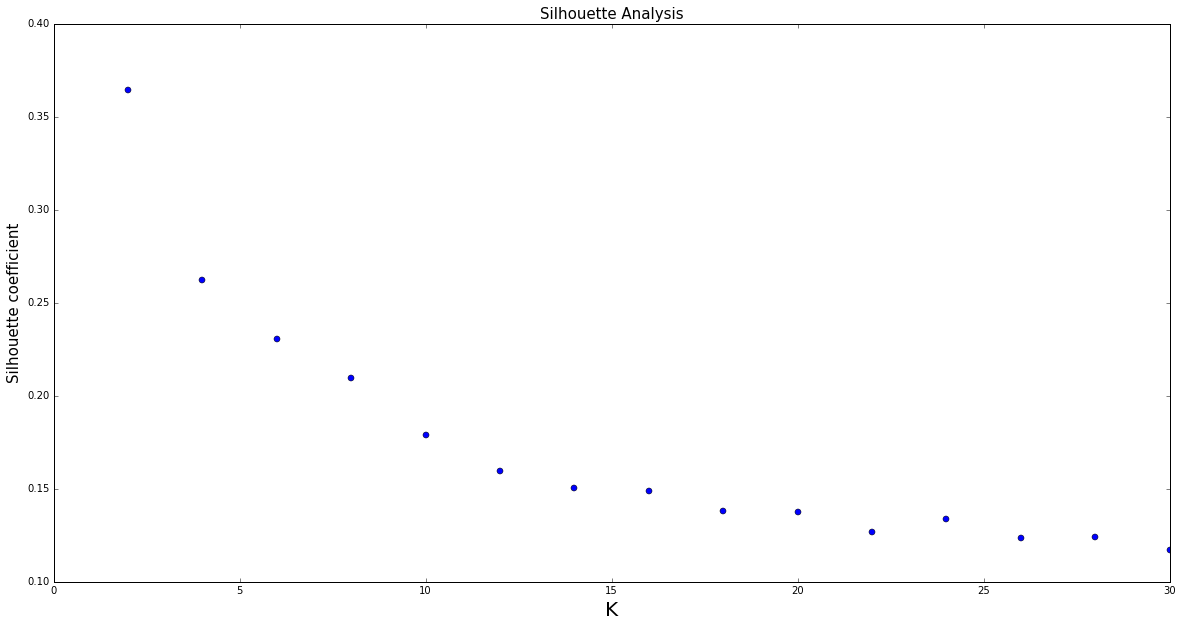

In [27]:
def silhouette_score_rev01(df,k):

    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(111)
    
    k_values_array = np.array([])
    silhouette_array = np.array([])

    #k_list = [2,4,6,8,10,12]
    k_list = list(range(2,k+2,2))

    for i in k_list:
        #K-means for range of clusters 
        kmeans = KMeans(n_clusters=i, max_iter=300, random_state=3) #15 clusters and random_stat = 3 gives good cluster
        kmeans.fit(df)
        labels_kmeans = kmeans.labels_
        #Silhouette score for every k computed
        silhouette_ave = silhouette_score(df.values, labels_kmeans)
    
        #x and y axis to plot k value and silhouette score 
        k_values_array = np.append(k_values_array, [int(i)])
        silhouette_array = np.append(silhouette_array, [silhouette_ave])
    
    
    ax.set_ylabel("Silhouette coefficient", fontsize = 15)
    ax.set_xlabel("K", fontsize = 20)
    ax.set_title("Silhouette Analysis", fontsize = 15)
    
    plt.plot(k_values_array, silhouette_array, "bo")
    
    fig.savefig("Silhouette Analysis.pdf")  

silhouette_score_rev01(df5_log2_ratio,30)

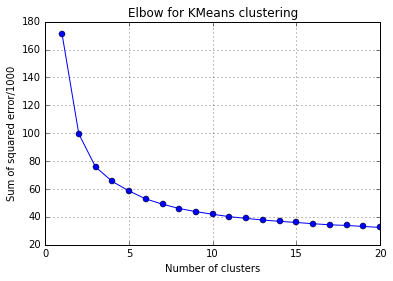

In [28]:
#Elbow method for cluster finding - stolen from the interwebs. 
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,21) 
KM = [KMeans(n_clusters=k).fit(df5_log2_ratio) for k in K] 
centroids = [k.cluster_centers_ for k in KM] 

D_k = [cdist(df5_log2_ratio, cent, 'euclidean') for cent in centroids] 
                        
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/df5_log2_ratio.shape[0] for d in dist] #not plotting this

# Total with-in sum of square
wcss = [sum(d**2)/1000 for d in dist]
tss = sum(pdist(df5_log2_ratio)**2)/df5_log2_ratio.shape[0]
bss = tss-wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, wcss, 'bo-')
#ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
#markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error/1000')
plt.title('Elbow for KMeans clustering')

In [29]:
"""
#breaking down the code, non list version of the code.
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = 10
KM = KMeans(n_clusters=K).fit(df5_log2_ratio) #a list of Kmeans objects for every k in wanted range
centroids = KM.cluster_centers_  #list of (list of centroids) - one list for every k value in the Kmeans object

D_k = cdist(df5_log2_ratio, centroids, 'euclidean')  #scipy dist pacakge - euclidean distance between
                    #centroid and every samples i.e. [all dist to centroid 1(4410,1), all dist to centroid 2 (4410,1)]
                    #interesting that cdist accepts both a list and a dataframe.
        
dist = np.min(D_k,axis=1) #euclidean distance from gene to its cluster center 
avgWithinSS = sum(dist)/df5_log2_ratio.shape[0] #sum of all distances/ number of genes



wcss = sum(dist**2) #all the distances from gene to center squard and added up

tss = sum(pdist(df5_log2_ratio)**2)/df5_log2_ratio.shape[0] #pdist creates a list of all the distances between every 
                                            #pair of genes. It removes the diagnal distance 0, and the duplicate half
                                            #of the matrix. Use scipy.spacial.distance.sqiareform to create a matrix
        #every distance between pair of genes squared and summed divided by total gene count
        
        
#bss = tss-wcss
"""

"\n#breaking down the code, non list version of the code.\nfrom scipy.spatial.distance import cdist, pdist\nfrom sklearn.cluster import KMeans\n\nK = 10\nKM = KMeans(n_clusters=K).fit(df5_log2_ratio) #a list of Kmeans objects for every k in wanted range\ncentroids = KM.cluster_centers_  #list of (list of centroids) - one list for every k value in the Kmeans object\n\nD_k = cdist(df5_log2_ratio, centroids, 'euclidean')  #scipy dist pacakge - euclidean distance between\n                    #centroid and every samples i.e. [all dist to centroid 1(4410,1), all dist to centroid 2 (4410,1)]\n                    #interesting that cdist accepts both a list and a dataframe.\n        \ndist = np.min(D_k,axis=1) #euclidean distance from gene to its cluster center \navgWithinSS = sum(dist)/df5_log2_ratio.shape[0] #sum of all distances/ number of genes\n\n\n\nwcss = sum(dist**2) #all the distances from gene to center squard and added up\n\ntss = sum(pdist(df5_log2_ratio)**2)/df5_log2_ratio.shape[0]

In [30]:
#Mary has a list of genes that are known to be Cu repressible. 
# genes #43 - 52 should be in a single cluster. 
# genes #53 - 56 & #42 should be in another

Marys_list = ["MBURv2_130042",
"MBURv2_130043",
"MBURv2_130044",
"MBURv2_130045",
"MBURv2_130046",
"MBURv2_130047",
"MBURv2_130048",
"MBURv2_130049",
"MBURv2_130050",
"MBURv2_130051",
"MBURv2_130052",
"MBURv2_130053",
"MBURv2_130054",
"MBURv2_130055",
"MBURv2_130056"]

df6_clusters.loc[Marys_list,:]

,FM18_CH3OH_4.1/day,FM18_CH3OH_4.1/day_R1,FM20_no-lim_5.2/day,FM20_no-lim_5.2/day_R1,FM21_no-lim_5.4/day,FM21_no-lim_5.4/day_R1,FM21_no-lim_5.4/day_R2,FM12_CH4-lim_3.0/day,FM12_CH4-lim_3.0/day_R1,FM14_CH4-lim_3.0/day,...,FM69_O2-lim+_0.7/day_t2,FM69_?-lim_0.7/day_t3,FM69_?-lim_0.7/day_t3_R1,FM69_?-lim_0.7/day_t4,FM69_?-lim_0.7/day_t4_R2,FM80_O2-lim_0.7/day_t2,FM80_O2-lim_0.7/day_t4,FM81_O2-lim+_0.7/day_t1,FM81_O2-lim_0.7/day_t2,cluster
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_130042,0.512478,0.306624,-0.562716,-0.627384,-0.870515,-0.795752,-0.843168,-2.263358,-2.160109,-2.432761,...,-0.904998,0.154783,-0.024221,0.154579,0.085307,-1.129870,-1.423175,-1.413000,-1.454030,1
MBURv2_130043,0.053738,-0.324754,-0.841925,-0.966076,-0.921776,-0.923676,-0.901111,-1.461884,-1.435914,-1.242768,...,-1.648644,-0.106019,-0.237772,0.011557,-0.202542,-1.169046,-1.211905,-1.321351,-1.397312,17
MBURv2_130044,-0.003614,0.709302,-0.931315,-0.601928,-0.799558,-1.016033,-0.842674,-1.158995,-1.418332,-0.877443,...,-0.617436,0.166197,0.337836,0.233419,0.010780,-1.140063,-1.033964,-1.191429,-1.320112,17
MBURv2_130045,0.378331,0.555634,0.077329,-0.139059,-0.050052,-0.012316,-0.051977,-0.757943,-0.905771,-0.292680,...,0.529405,1.425513,1.816521,1.468186,1.769056,0.109872,-0.110897,-0.009822,-0.192379,17
MBURv2_130046,0.032318,0.102818,-0.048134,0.092432,-0.161698,-0.123492,-0.065192,-0.491639,-0.348879,-0.317692,...,0.409405,1.193039,1.392829,1.344473,1.426664,0.081649,-0.210297,-0.039475,-0.234811,17
MBURv2_130047,-0.811752,-0.749821,-1.376769,-1.156276,-1.188494,-1.221307,-1.181551,-1.575526,-1.571865,-1.683787,...,-0.319069,0.176159,0.583429,0.052947,0.657548,-1.307076,-1.243375,-1.231486,-1.297171,17
MBURv2_130048,0.143003,0.159916,0.115260,0.310661,0.213120,0.148696,0.206739,-0.170275,-0.026129,-0.222399,...,1.629401,1.789545,1.709686,2.067844,1.795051,0.490016,0.334397,0.932075,0.755391,22
MBURv2_130049,0.255934,0.776646,0.874237,1.155871,1.034837,0.905742,0.790504,0.351518,0.239509,0.443723,...,2.324787,1.897765,2.222548,2.690242,3.116979,1.234020,1.202733,1.690618,1.563350,22
MBURv2_130050,0.458801,0.420688,0.541936,0.607896,0.403798,0.555539,0.428760,0.163059,0.339334,-0.072028,...,1.478411,2.174650,2.450171,2.364854,2.469065,0.923363,0.569512,1.305608,1.221036,22


In [31]:
#List of genes that appear to be interesting

df3_TPM.loc[['MBURv2_160425',
 'MBURv2_200002',
 'MBURv2_210001',
 'MBURv2_210002',
 'MBURv2_210003',
 'MBURv2_210005',
 'MBURv2_210007',
 'MBURv2_60380'],:]

,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM23_TR3,FM18_CH3OH_4.1/day,...,FM34_+Cu_2.7/day_t480m,FM69_O2-lim+_0.7/day_t2,FM69_?-lim_0.7/day_t3,FM69_?-lim_0.7/day_t3_R1,FM69_?-lim_0.7/day_t4,FM69_?-lim_0.7/day_t4_R2,FM80_O2-lim_0.7/day_t2,FM80_O2-lim_0.7/day_t4,FM81_O2-lim+_0.7/day_t1,FM81_O2-lim_0.7/day_t2
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_160425,exported protein of unknown function,CDS,NaN,MBURv2,3741467,3742831,Evidence 5 : No homology to any previously rep...,NaN,30.396462,144.293422,...,34.957819,1174.321337,53.422300,46.598553,58.087583,53.561907,39.383273,33.107090,285.112527,153.395450
MBURv2_200002,conserved protein of unknown function,CDS,NaN,MBURv2,4089082,4089993,Evidence 4 : Homologs of previously reported g...,NaN,166.892490,5123.181202,...,287.596293,43449.868530,71.935354,59.553561,72.340711,61.761057,34.057319,28.262535,12520.470934,6628.994939
MBURv2_210001,protein of unknown function,CDS,NaN,MBURv2,4091285,4091434,Evidence 5 : No homology to any previously rep...,NaN,18.631614,366.702683,...,237.007065,4272.950018,39.883123,30.980591,52.802616,52.222859,18.168270,17.956759,1075.436838,567.069172
MBURv2_210002,conserved exported protein of unknown function,CDS,NaN,MBURv2,4091448,4091843,Evidence 4 : Homologs of previously reported g...,NaN,26.058201,1332.721508,...,594.113671,13061.022980,107.077693,130.552678,98.491367,153.541235,42.139978,34.575831,2260.848056,1208.886953
MBURv2_210003,conserved exported protein of unknown function,CDS,NaN,MBURv2,4092017,4092586,Evidence 4 : Homologs of previously reported g...,NaN,32.624182,764.368160,...,123.908957,2951.449083,59.427555,42.292582,59.036780,22.904763,26.132443,23.889841,1327.517126,715.521567
MBURv2_210005,conserved protein of unknown function,CDS,NaN,MBURv2,4094354,4095007,Evidence 4 : Homologs of previously reported g...,NaN,2.465369,47.225361,...,14.254248,263.878642,2.781336,3.996923,3.535013,2.851838,1.541232,1.887656,96.857377,45.645118
MBURv2_210007,putative Bacterial type II secretion system pr...,CDS,NaN,MBURv2,4097453,4098670,Evidence 3 : Function proposed based on presen...,NaN,4.765570,78.390777,...,8.561832,161.466565,6.405141,4.769180,7.030038,4.900104,3.402183,4.668561,92.648716,45.759661
MBURv2_60380,Copper-repressible polypeptide,CDS,corA,MBURv2,1788771,1789478,NaN,NaN,499.646679,5165.512327,...,5040.082454,27131.249127,920.915561,760.977163,798.328152,654.366336,1071.345779,894.614804,18103.892488,13562.379236


# Plotting the resulting clusters

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

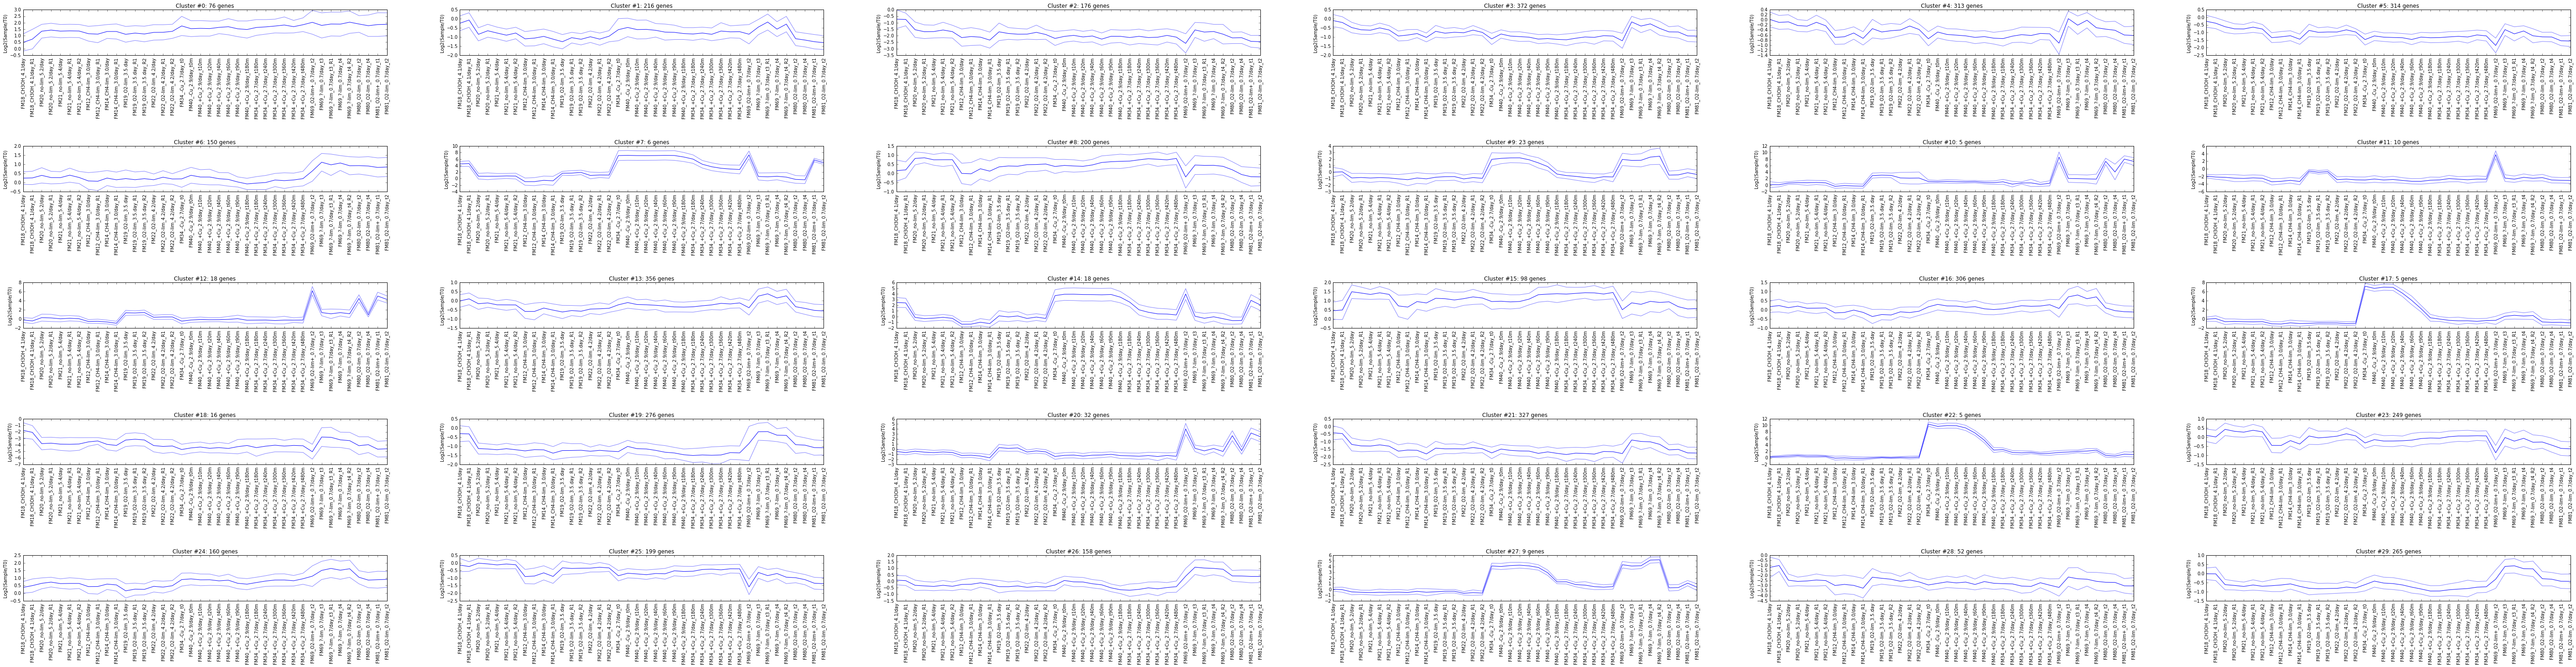

In [33]:
def draw_clust_means(df, n_rows, n_cols):
    
    """
    Draw scatter plot of mean gene expression level for genes in that cluster.
    Will include 1 standard deviation error margin within the plot. 
    Plot will be saves as pdf file. 
    
    
    df: daframe with locus tag as index, and "cluster" column with cluster number for each gene. 
    n_rows: int value for the subplot grid
    n_cols: int value for subplot grid
    
    """
    
    fig = plt.figure(figsize = (100, 50))
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    y_stdev = df.groupby("cluster").std()
    y_mean = df.groupby("cluster").mean()
    
    y_low = y_mean.subtract(y_stdev, fill_value=0)
    y_high = y_mean.add(y_stdev, fill_value = 0)
    
    count = df.groupby("cluster").count().iloc[:,0]
    
    for i in range(y_mean.shape[0]):
        y = y_mean.values[i]
        y_hi = y_high.values[i]
        y_lo = y_low.values[i]
        
        title_str = "Cluster #"+ str(i) + ": " + str(count[i]) + " genes"
        
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        ax.set_title(title_str)
        ax.set_ylabel("Log2(Sample/T0)")
        
        ax.plot(x_axis, y, "b-")
        ax.plot(x_axis, y_hi, "b-", alpha = 0.5)
        ax.plot(x_axis, y_lo, "b-", alpha = 0.5 )
        
    fig.subplots_adjust(hspace = 2)
    plt.show()
    fig.savefig("cluster_means.pdf")
    
    
testa = df6_clusters #.iloc[:500,:]
draw_clust_means(testa, 10, 6 )

In [ ]:
def draw_clst_genes(df, clst):
    
    """
    Plots the expression profile of each gene in a specified cluster. Creates subplots with 5 genes per subplot. 
    
    
    df: dataframe with normalized read counts for each sample and a "cluster" column with cluster id #
    clst: int value of the cluster number the genes of which need to be plotting across samples. 
    """
    

    fig = plt.figure(figsize = (100, 50))
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    clst_index = df.loc[df["cluster"] == clst,:].index
    
    n_cols = 6
    n_rows = 10
    
    count_subplots = 1
    for i, val in enumerate(clst_index):
        
        if i % 5 == 0:
            ax = fig.add_subplot(n_rows, n_cols, count_subplots)
            count_subplots += 1
            title_str = "Cluster #"+ str(clst) + " genes " + str(i) + "-" + str(i + 5) +" of " + str(len(clst_index))
             
        y = df.loc[val, (df.columns != "cluster")].values
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        ax.set_title(title_str)
        ax.set_ylabel("Log2(Sample/T0)")
        
        ax.plot(x_axis,y, label = str(val))
        leg = ax.legend(fancybox = True ,loc='upper left')
        leg.get_frame().set_alpha(0.5) #translucent 
        
        for label in leg.get_texts():
            label.set_fontsize('small')
        
    fig.subplots_adjust(hspace = 2)
    plt.show()
    fig.savefig("cluster " + str(clst) + " genes.pdf")
    return list(clst_index) #returns a list 
    
testa = df6_clusters #.iloc[:500,:]
the_list = draw_clst_genes(testa, 29)

In [ ]:
df2_cleaned_up.loc[the_list,:]

In [ ]:
def draw_gene_list(df, gene_list):
    
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(111)
    
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    title_str = "Select gene expression across samples"
    
    for i in gene_list:
        y = df.loc[i, (df.columns != "cluster")].values
        ax.plot(x_axis, y, label = str(i))
        
        leg = ax.legend(fancybox = True ,loc='upper left')
        
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        #ax.set_title(title_str, fontsize = 50)
        ax.set_ylabel("Log2(Sample/T0)", fontsize = 15)
        
    fig.suptitle(title_str, fontsize = 20)
    plt.show()
    fig.savefig("list_of_genes.pdf")    

In [ ]:
the_list

In [ ]:
Cu_repres_conserved = ["MBURv2_130042",
"MBURv2_130043",
"MBURv2_130044",
"MBURv2_130045",
"MBURv2_130046",
"MBURv2_130047",
"MBURv2_130048",
"MBURv2_130049",
"MBURv2_130050",
"MBURv2_130051"]


In [ ]:
#list of Cu repressible genes (including genes not conserved in other methanotrophs)
draw_gene_list(testa, Cu_repres_conserved)


In [ ]:
#which gene is low?
draw_gene_list(testa, ["MBURv2_130042"])

In [ ]:
#Cu repressible genes not conserved in other methanotrophs 
Cu_repres_not_conserved = ["MBURv2_130052",
"MBURv2_130053",
"MBURv2_130054",
"MBURv2_130055",
"MBURv2_130056"]


In [ ]:
draw_gene_list(testa, Cu_repres_not_conserved)

In [ ]:
#which gene is high? 

draw_gene_list(testa, ["MBURv2_130052"])


In [ ]:
#which cluster do these genes belong to?

In [ ]:
Marys_list = ["MBURv2_130042",
"MBURv2_130043",
"MBURv2_130044",
"MBURv2_130045",
"MBURv2_130046",
"MBURv2_130047",
"MBURv2_130048",
"MBURv2_130049",
"MBURv2_130050",
"MBURv2_130051",
"MBURv2_130052",
"MBURv2_130053",
"MBURv2_130054",
"MBURv2_130055",
"MBURv2_130056"]

df6_clusters.loc[Marys_list,:]


# Going to try to cluster with HDBSCAN just for giggles

In [ ]:
"""
import hdbscan
X = df5_log2_ratio
HDBSCAN = hdbscan.HDBSCAN(metric = "euclidean", min_cluster_size=5)
HDBSCAN.fit(X)
labels = HDBSCAN.labels_



print(np.unique(labels)) # unique bins, zero is noise
print(np.bincount(labels[labels!=-1])) 
"""